Espacio de observación 
El estado es un vector de 8 dimensiones: las coordenadas del módulo de aterrizaje en x& y, sus velocidades lineales en x& y, su ángulo, su velocidad angular y dos valores booleanos que representan si cada pata está en contacto con el suelo o no.
UCB significa Upper Confidence Bound (UCB)

c:\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


Episode 0, Reward -100, Terminated True, Truncated False
Episode 1, Reward -100, Terminated True, Truncated False
Episode 2, Reward -100, Terminated True, Truncated False
Episode 3, Reward -100, Terminated True, Truncated False
Episode 4, Reward -100, Terminated True, Truncated False
Episode 5, Reward -100, Terminated True, Truncated False
Episode 6, Reward -100, Terminated True, Truncated False
Episode 7, Reward -100, Terminated True, Truncated False
Episode 8, Reward 100, Terminated True, Truncated False
Episode 9, Reward -100, Terminated True, Truncated False
Episode 10, Reward -100, Terminated True, Truncated False
Episode 11, Reward -100, Terminated True, Truncated False
Episode 12, Reward -100, Terminated True, Truncated False
Episode 13, Reward -100, Terminated True, Truncated False
Episode 14, Reward -100, Terminated True, Truncated False
Episode 15, Reward -100, Terminated True, Truncated False
Episode 16, Reward -100, Terminated True, Truncated False
Episode 17, Reward -100, 

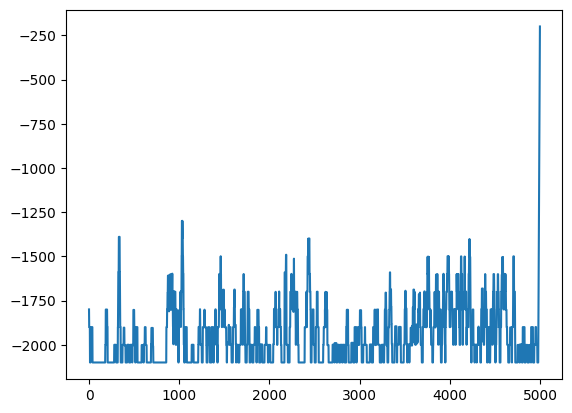

Episode 0, Reward -100, Terminated True, Truncated False
Episode 1, Reward -100, Terminated True, Truncated False
Episode 2, Reward -100, Terminated True, Truncated False
Episode 3, Reward -100, Terminated True, Truncated False
Episode 4, Reward -100, Terminated True, Truncated False
Episode 5, Reward -100, Terminated True, Truncated False
Episode 6, Reward -100, Terminated True, Truncated False
Episode 7, Reward -100, Terminated True, Truncated False
Episode 8, Reward -100, Terminated True, Truncated False
Episode 9, Reward -100, Terminated True, Truncated False


In [4]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

def discretize_state(state, bins):
    discrete_state = tuple(
        np.digitize(state[i], bins[i]) - 1 for i in range(len(state))
    )
    return discrete_state

def create_bins(num_bins, state_space):
    bins = []
    for i in range(len(state_space.low)):
        bins.append(np.linspace(state_space.low[i], state_space.high[i], num_bins + 1)[1:-1])
    return bins

def ucb(q_values, action_counts, t):
    ucb_values = q_values + np.sqrt(2 * np.log(t + 1) / (action_counts + 1e-5))
    return np.argmax(ucb_values)

def train(episodes, is_trainning=True, render=False):
    env = gym.make("LunarLander-v2", render_mode="human" if render else None)
    num_bins = 10
    if is_trainning:
        q_table = np.zeros([num_bins] * len(env.observation_space.low) + [env.action_space.n])
    else:
        with open("lunar_lander_ucb.pkl", "rb") as f:
            q_table = pickle.load(f)
    
    
    bins = create_bins(num_bins, env.observation_space)
    action_counts = np.zeros([num_bins] * len(env.observation_space.low) + [env.action_space.n])
    
    learning_rate = 0.5
    discount_factor = 0.95
    rng = np.random.default_rng()  # Random number generator
    
    rewards_per_episode = np.zeros(episodes)
    
    # Training loop
    for i in range(episodes):
            
        state = env.reset()[0]
        discrete_state = discretize_state(state, bins)
        
        terminated = False
        truncated = False
        t = 0
        
        while (not terminated and not truncated):
            action = ucb(q_table[discrete_state], action_counts[discrete_state], t)
                
            new_state, reward, terminated, truncated, _ = env.step(action)
            new_discrete_state = discretize_state(new_state, bins)
            if is_trainning:
                q_table[discrete_state + (action,)] += learning_rate * (
                    reward + discount_factor * np.max(q_table[new_discrete_state]) - q_table[discrete_state + (action,)]
                )
            action_counts[discrete_state + (action,)] += 1
            
            state = new_state
            discrete_state = new_discrete_state
            t += 1
            
        rewards_per_episode[i] = reward
            
        print(f"Episode {i}, Reward {reward}, Terminated {terminated}, Truncated {truncated}")
        
    env.close()

    if is_trainning:
        with open("lunar_lander_ucb.pkl", "wb") as f:
            pickle.dump(q_table, f)
        
        sum_rewards = np.zeros(episodes)
        for t in range(episodes):
         sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-1):(t+20)])
        
        plt.plot(sum_rewards)
        plt.show()
        
if __name__== "__main__":
    train(5000, is_trainning=True, render=False)

    train(10, is_trainning=False, render=True)

In [6]:
train(10, is_trainning=False, render=True)

Episode 0, Reward -100, Terminated True, Truncated False
Episode 1, Reward -100, Terminated True, Truncated False
Episode 2, Reward -100, Terminated True, Truncated False
Episode 3, Reward -100, Terminated True, Truncated False
Episode 4, Reward -100, Terminated True, Truncated False
Episode 5, Reward -100, Terminated True, Truncated False
Episode 6, Reward -100, Terminated True, Truncated False
Episode 7, Reward -100, Terminated True, Truncated False
Episode 8, Reward -100, Terminated True, Truncated False
Episode 9, Reward -100, Terminated True, Truncated False
